In [1]:
# Import Library
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import copy as cp
import seaborn as sns
from typing import Tuple

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC, LinearSVC

# target models based on the literature are SVM, K-NN and Decision tree

In [2]:
xy=pd.read_csv('x_and_y.csv')
xy

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,class_list
0,0,0.0831,0.006906,57.9295,55.964653,11,12,46,25,21,...,51.178712,2.047148,21.438121,2.593537,13.261627,1528.0,36.0,4.308,134.0,0
1,0,1.9192,3.683329,40.1952,52.968102,17,18,42,28,14,...,56.303388,2.010835,28.307668,2.565487,13.086362,2074.0,41.0,6.674,146.0,1
2,0,0.9761,0.952771,52.6577,50.781688,11,12,42,26,16,...,52.487307,2.018743,28.508581,2.593191,13.256473,1691.0,37.0,4.995,136.0,0
3,0,2.3543,5.542728,43.2530,42.123309,11,12,36,23,13,...,45.450289,1.976100,28.037004,5.466275,12.664051,1291.0,33.0,3.483,118.0,1
4,0,0.8095,0.655290,34.6316,51.784274,17,18,42,24,18,...,48.676019,2.028167,18.354357,2.558824,12.987012,1377.0,37.0,6.174,124.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0,0.3003,0.090180,52.2395,59.434204,12,12,53,25,28,...,49.597478,1.983899,11.728440,5.564791,6.163648,1694.0,36.0,6.505,122.0,0
2710,0,0.5897,0.347746,48.0680,43.113446,6,6,40,18,22,...,34.905784,1.939210,11.584307,5.529183,6.055124,654.0,25.0,2.780,84.0,1
2711,0,0.8066,0.650604,127.5638,82.895513,0,0,77,36,41,...,73.398740,2.038854,21.474519,8.215617,6.102164,3549.0,87.0,4.688,228.0,1
2712,0,0.7823,0.611993,135.7697,89.302271,0,0,83,36,47,...,73.398740,2.038854,16.703360,8.215617,6.102164,3549.0,87.0,4.583,228.0,1


In [3]:
new_xy = xy[xy.class_list!='intermediate']
new_xy

C:\Users\Ephphatha\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,class_list
0,0,0.0831,0.006906,57.9295,55.964653,11,12,46,25,21,...,51.178712,2.047148,21.438121,2.593537,13.261627,1528.0,36.0,4.308,134.0,0
1,0,1.9192,3.683329,40.1952,52.968102,17,18,42,28,14,...,56.303388,2.010835,28.307668,2.565487,13.086362,2074.0,41.0,6.674,146.0,1
2,0,0.9761,0.952771,52.6577,50.781688,11,12,42,26,16,...,52.487307,2.018743,28.508581,2.593191,13.256473,1691.0,37.0,4.995,136.0,0
3,0,2.3543,5.542728,43.2530,42.123309,11,12,36,23,13,...,45.450289,1.976100,28.037004,5.466275,12.664051,1291.0,33.0,3.483,118.0,1
4,0,0.8095,0.655290,34.6316,51.784274,17,18,42,24,18,...,48.676019,2.028167,18.354357,2.558824,12.987012,1377.0,37.0,6.174,124.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0,0.3003,0.090180,52.2395,59.434204,12,12,53,25,28,...,49.597478,1.983899,11.728440,5.564791,6.163648,1694.0,36.0,6.505,122.0,0
2710,0,0.5897,0.347746,48.0680,43.113446,6,6,40,18,22,...,34.905784,1.939210,11.584307,5.529183,6.055124,654.0,25.0,2.780,84.0,1
2711,0,0.8066,0.650604,127.5638,82.895513,0,0,77,36,41,...,73.398740,2.038854,21.474519,8.215617,6.102164,3549.0,87.0,4.688,228.0,1
2712,0,0.7823,0.611993,135.7697,89.302271,0,0,83,36,47,...,73.398740,2.038854,16.703360,8.215617,6.102164,3549.0,87.0,4.583,228.0,1


In [4]:
y = new_xy.class_list.values
# X = new_xy.iloc[:, : -1].values
X = new_xy[new_xy.columns.drop('class_list')]
print(X.shape, y)

(2714, 1444) [0 1 0 ... 1 1 1]


In [5]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_std =StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
print(X_train.shape, y_train.shape)

(1899, 1444) (1899,)


In [6]:
kfold = KFold(n_splits=6, random_state=42, shuffle=True)
svc = SVC(kernel="linear")

model = RFECV(svc, cv=kfold, scoring='accuracy',min_features_to_select=1,verbose=10)

In [7]:
model.fit(X_train_std, y_train)

Fitting estimator with 1444 features.
Fitting estimator with 1443 features.
Fitting estimator with 1442 features.
Fitting estimator with 1441 features.
Fitting estimator with 1440 features.
Fitting estimator with 1439 features.
Fitting estimator with 1438 features.
Fitting estimator with 1437 features.
Fitting estimator with 1436 features.
Fitting estimator with 1435 features.
Fitting estimator with 1434 features.
Fitting estimator with 1433 features.
Fitting estimator with 1432 features.
Fitting estimator with 1431 features.
Fitting estimator with 1430 features.
Fitting estimator with 1429 features.
Fitting estimator with 1428 features.
Fitting estimator with 1427 features.
Fitting estimator with 1426 features.
Fitting estimator with 1425 features.
Fitting estimator with 1424 features.
Fitting estimator with 1423 features.
Fitting estimator with 1422 features.
Fitting estimator with 1421 features.
Fitting estimator with 1420 features.
Fitting estimator with 1419 features.
Fitting esti

Fitting estimator with 1228 features.
Fitting estimator with 1227 features.
Fitting estimator with 1226 features.
Fitting estimator with 1225 features.
Fitting estimator with 1224 features.
Fitting estimator with 1223 features.
Fitting estimator with 1222 features.
Fitting estimator with 1221 features.
Fitting estimator with 1220 features.
Fitting estimator with 1219 features.
Fitting estimator with 1218 features.
Fitting estimator with 1217 features.
Fitting estimator with 1216 features.
Fitting estimator with 1215 features.
Fitting estimator with 1214 features.
Fitting estimator with 1213 features.
Fitting estimator with 1212 features.
Fitting estimator with 1211 features.
Fitting estimator with 1210 features.
Fitting estimator with 1209 features.
Fitting estimator with 1208 features.
Fitting estimator with 1207 features.
Fitting estimator with 1206 features.
Fitting estimator with 1205 features.
Fitting estimator with 1204 features.
Fitting estimator with 1203 features.
Fitting esti

Fitting estimator with 1012 features.
Fitting estimator with 1011 features.
Fitting estimator with 1010 features.
Fitting estimator with 1009 features.
Fitting estimator with 1008 features.
Fitting estimator with 1007 features.
Fitting estimator with 1006 features.
Fitting estimator with 1005 features.
Fitting estimator with 1004 features.
Fitting estimator with 1003 features.
Fitting estimator with 1002 features.
Fitting estimator with 1001 features.
Fitting estimator with 1000 features.
Fitting estimator with 999 features.
Fitting estimator with 998 features.
Fitting estimator with 997 features.
Fitting estimator with 996 features.
Fitting estimator with 995 features.
Fitting estimator with 994 features.
Fitting estimator with 993 features.
Fitting estimator with 992 features.
Fitting estimator with 991 features.
Fitting estimator with 990 features.
Fitting estimator with 989 features.
Fitting estimator with 988 features.
Fitting estimator with 987 features.
Fitting estimator with 98

Fitting estimator with 790 features.
Fitting estimator with 789 features.
Fitting estimator with 788 features.
Fitting estimator with 787 features.
Fitting estimator with 786 features.
Fitting estimator with 785 features.
Fitting estimator with 784 features.
Fitting estimator with 783 features.
Fitting estimator with 782 features.
Fitting estimator with 781 features.
Fitting estimator with 780 features.
Fitting estimator with 779 features.
Fitting estimator with 778 features.
Fitting estimator with 777 features.
Fitting estimator with 776 features.
Fitting estimator with 775 features.
Fitting estimator with 774 features.
Fitting estimator with 773 features.
Fitting estimator with 772 features.
Fitting estimator with 771 features.
Fitting estimator with 770 features.
Fitting estimator with 769 features.
Fitting estimator with 768 features.
Fitting estimator with 767 features.
Fitting estimator with 766 features.
Fitting estimator with 765 features.
Fitting estimator with 764 features.
F

Fitting estimator with 568 features.
Fitting estimator with 567 features.
Fitting estimator with 566 features.
Fitting estimator with 565 features.
Fitting estimator with 564 features.
Fitting estimator with 563 features.
Fitting estimator with 562 features.
Fitting estimator with 561 features.
Fitting estimator with 560 features.
Fitting estimator with 559 features.
Fitting estimator with 558 features.
Fitting estimator with 557 features.
Fitting estimator with 556 features.
Fitting estimator with 555 features.
Fitting estimator with 554 features.
Fitting estimator with 553 features.
Fitting estimator with 552 features.
Fitting estimator with 551 features.
Fitting estimator with 550 features.
Fitting estimator with 549 features.
Fitting estimator with 548 features.
Fitting estimator with 547 features.
Fitting estimator with 546 features.
Fitting estimator with 545 features.
Fitting estimator with 544 features.
Fitting estimator with 543 features.
Fitting estimator with 542 features.
F

Fitting estimator with 346 features.
Fitting estimator with 345 features.
Fitting estimator with 344 features.
Fitting estimator with 343 features.
Fitting estimator with 342 features.
Fitting estimator with 341 features.
Fitting estimator with 340 features.
Fitting estimator with 339 features.
Fitting estimator with 338 features.
Fitting estimator with 337 features.
Fitting estimator with 336 features.
Fitting estimator with 335 features.
Fitting estimator with 334 features.
Fitting estimator with 333 features.
Fitting estimator with 332 features.
Fitting estimator with 331 features.
Fitting estimator with 330 features.
Fitting estimator with 329 features.
Fitting estimator with 328 features.
Fitting estimator with 327 features.
Fitting estimator with 326 features.
Fitting estimator with 325 features.
Fitting estimator with 324 features.
Fitting estimator with 323 features.
Fitting estimator with 322 features.
Fitting estimator with 321 features.
Fitting estimator with 320 features.
F

Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fit

Fitting estimator with 1345 features.
Fitting estimator with 1344 features.
Fitting estimator with 1343 features.
Fitting estimator with 1342 features.
Fitting estimator with 1341 features.
Fitting estimator with 1340 features.
Fitting estimator with 1339 features.
Fitting estimator with 1338 features.
Fitting estimator with 1337 features.
Fitting estimator with 1336 features.
Fitting estimator with 1335 features.
Fitting estimator with 1334 features.
Fitting estimator with 1333 features.
Fitting estimator with 1332 features.
Fitting estimator with 1331 features.
Fitting estimator with 1330 features.
Fitting estimator with 1329 features.
Fitting estimator with 1328 features.
Fitting estimator with 1327 features.
Fitting estimator with 1326 features.
Fitting estimator with 1325 features.
Fitting estimator with 1324 features.
Fitting estimator with 1323 features.
Fitting estimator with 1322 features.
Fitting estimator with 1321 features.
Fitting estimator with 1320 features.
Fitting esti

Fitting estimator with 1129 features.
Fitting estimator with 1128 features.
Fitting estimator with 1127 features.
Fitting estimator with 1126 features.
Fitting estimator with 1125 features.
Fitting estimator with 1124 features.
Fitting estimator with 1123 features.
Fitting estimator with 1122 features.
Fitting estimator with 1121 features.
Fitting estimator with 1120 features.
Fitting estimator with 1119 features.
Fitting estimator with 1118 features.
Fitting estimator with 1117 features.
Fitting estimator with 1116 features.
Fitting estimator with 1115 features.
Fitting estimator with 1114 features.
Fitting estimator with 1113 features.
Fitting estimator with 1112 features.
Fitting estimator with 1111 features.
Fitting estimator with 1110 features.
Fitting estimator with 1109 features.
Fitting estimator with 1108 features.
Fitting estimator with 1107 features.
Fitting estimator with 1106 features.
Fitting estimator with 1105 features.
Fitting estimator with 1104 features.
Fitting esti

Fitting estimator with 911 features.
Fitting estimator with 910 features.
Fitting estimator with 909 features.
Fitting estimator with 908 features.
Fitting estimator with 907 features.
Fitting estimator with 906 features.
Fitting estimator with 905 features.
Fitting estimator with 904 features.
Fitting estimator with 903 features.
Fitting estimator with 902 features.
Fitting estimator with 901 features.
Fitting estimator with 900 features.
Fitting estimator with 899 features.
Fitting estimator with 898 features.
Fitting estimator with 897 features.
Fitting estimator with 896 features.
Fitting estimator with 895 features.
Fitting estimator with 894 features.
Fitting estimator with 893 features.
Fitting estimator with 892 features.
Fitting estimator with 891 features.
Fitting estimator with 890 features.
Fitting estimator with 889 features.
Fitting estimator with 888 features.
Fitting estimator with 887 features.
Fitting estimator with 886 features.
Fitting estimator with 885 features.
F

Fitting estimator with 689 features.
Fitting estimator with 688 features.
Fitting estimator with 687 features.
Fitting estimator with 686 features.
Fitting estimator with 685 features.
Fitting estimator with 684 features.
Fitting estimator with 683 features.
Fitting estimator with 682 features.
Fitting estimator with 681 features.
Fitting estimator with 680 features.
Fitting estimator with 679 features.
Fitting estimator with 678 features.
Fitting estimator with 677 features.
Fitting estimator with 676 features.
Fitting estimator with 675 features.
Fitting estimator with 674 features.
Fitting estimator with 673 features.
Fitting estimator with 672 features.
Fitting estimator with 671 features.
Fitting estimator with 670 features.
Fitting estimator with 669 features.
Fitting estimator with 668 features.
Fitting estimator with 667 features.
Fitting estimator with 666 features.
Fitting estimator with 665 features.
Fitting estimator with 664 features.
Fitting estimator with 663 features.
F

Fitting estimator with 467 features.
Fitting estimator with 466 features.
Fitting estimator with 465 features.
Fitting estimator with 464 features.
Fitting estimator with 463 features.
Fitting estimator with 462 features.
Fitting estimator with 461 features.
Fitting estimator with 460 features.
Fitting estimator with 459 features.
Fitting estimator with 458 features.
Fitting estimator with 457 features.
Fitting estimator with 456 features.
Fitting estimator with 455 features.
Fitting estimator with 454 features.
Fitting estimator with 453 features.
Fitting estimator with 452 features.
Fitting estimator with 451 features.
Fitting estimator with 450 features.
Fitting estimator with 449 features.
Fitting estimator with 448 features.
Fitting estimator with 447 features.
Fitting estimator with 446 features.
Fitting estimator with 445 features.
Fitting estimator with 444 features.
Fitting estimator with 443 features.
Fitting estimator with 442 features.
Fitting estimator with 441 features.
F

Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
F

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 1444 features.
Fitting estimator with 1443 features.
Fitting estimator with 1442 features.
Fitting estimator with 1441 features.
Fitting estimator with 1440 features.
Fitting estimator with 1439 features.
Fitting estimator with 1438 features.
Fitting estimator with

Fitting estimator with 1247 features.
Fitting estimator with 1246 features.
Fitting estimator with 1245 features.
Fitting estimator with 1244 features.
Fitting estimator with 1243 features.
Fitting estimator with 1242 features.
Fitting estimator with 1241 features.
Fitting estimator with 1240 features.
Fitting estimator with 1239 features.
Fitting estimator with 1238 features.
Fitting estimator with 1237 features.
Fitting estimator with 1236 features.
Fitting estimator with 1235 features.
Fitting estimator with 1234 features.
Fitting estimator with 1233 features.
Fitting estimator with 1232 features.
Fitting estimator with 1231 features.
Fitting estimator with 1230 features.
Fitting estimator with 1229 features.
Fitting estimator with 1228 features.
Fitting estimator with 1227 features.
Fitting estimator with 1226 features.
Fitting estimator with 1225 features.
Fitting estimator with 1224 features.
Fitting estimator with 1223 features.
Fitting estimator with 1222 features.
Fitting esti

Fitting estimator with 1031 features.
Fitting estimator with 1030 features.
Fitting estimator with 1029 features.
Fitting estimator with 1028 features.
Fitting estimator with 1027 features.
Fitting estimator with 1026 features.
Fitting estimator with 1025 features.
Fitting estimator with 1024 features.
Fitting estimator with 1023 features.
Fitting estimator with 1022 features.
Fitting estimator with 1021 features.
Fitting estimator with 1020 features.
Fitting estimator with 1019 features.
Fitting estimator with 1018 features.
Fitting estimator with 1017 features.
Fitting estimator with 1016 features.
Fitting estimator with 1015 features.
Fitting estimator with 1014 features.
Fitting estimator with 1013 features.
Fitting estimator with 1012 features.
Fitting estimator with 1011 features.
Fitting estimator with 1010 features.
Fitting estimator with 1009 features.
Fitting estimator with 1008 features.
Fitting estimator with 1007 features.
Fitting estimator with 1006 features.
Fitting esti

Fitting estimator with 810 features.
Fitting estimator with 809 features.
Fitting estimator with 808 features.
Fitting estimator with 807 features.
Fitting estimator with 806 features.
Fitting estimator with 805 features.
Fitting estimator with 804 features.
Fitting estimator with 803 features.
Fitting estimator with 802 features.
Fitting estimator with 801 features.
Fitting estimator with 800 features.
Fitting estimator with 799 features.
Fitting estimator with 798 features.
Fitting estimator with 797 features.
Fitting estimator with 796 features.
Fitting estimator with 795 features.
Fitting estimator with 794 features.
Fitting estimator with 793 features.
Fitting estimator with 792 features.
Fitting estimator with 791 features.
Fitting estimator with 790 features.
Fitting estimator with 789 features.
Fitting estimator with 788 features.
Fitting estimator with 787 features.
Fitting estimator with 786 features.
Fitting estimator with 785 features.
Fitting estimator with 784 features.
F

Fitting estimator with 588 features.
Fitting estimator with 587 features.
Fitting estimator with 586 features.
Fitting estimator with 585 features.
Fitting estimator with 584 features.
Fitting estimator with 583 features.
Fitting estimator with 582 features.
Fitting estimator with 581 features.
Fitting estimator with 580 features.
Fitting estimator with 579 features.
Fitting estimator with 578 features.
Fitting estimator with 577 features.
Fitting estimator with 576 features.
Fitting estimator with 575 features.
Fitting estimator with 574 features.
Fitting estimator with 573 features.
Fitting estimator with 572 features.
Fitting estimator with 571 features.
Fitting estimator with 570 features.
Fitting estimator with 569 features.
Fitting estimator with 568 features.
Fitting estimator with 567 features.
Fitting estimator with 566 features.
Fitting estimator with 565 features.
Fitting estimator with 564 features.
Fitting estimator with 563 features.
Fitting estimator with 562 features.
F

Fitting estimator with 366 features.
Fitting estimator with 365 features.
Fitting estimator with 364 features.
Fitting estimator with 363 features.
Fitting estimator with 362 features.
Fitting estimator with 361 features.
Fitting estimator with 360 features.
Fitting estimator with 359 features.
Fitting estimator with 358 features.
Fitting estimator with 357 features.
Fitting estimator with 356 features.
Fitting estimator with 355 features.
Fitting estimator with 354 features.
Fitting estimator with 353 features.
Fitting estimator with 352 features.
Fitting estimator with 351 features.
Fitting estimator with 350 features.
Fitting estimator with 349 features.
Fitting estimator with 348 features.
Fitting estimator with 347 features.
Fitting estimator with 346 features.
Fitting estimator with 345 features.
Fitting estimator with 344 features.
Fitting estimator with 343 features.
Fitting estimator with 342 features.
Fitting estimator with 341 features.
Fitting estimator with 340 features.
F

Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
F

Fitting estimator with 1364 features.
Fitting estimator with 1363 features.
Fitting estimator with 1362 features.
Fitting estimator with 1361 features.
Fitting estimator with 1360 features.
Fitting estimator with 1359 features.
Fitting estimator with 1358 features.
Fitting estimator with 1357 features.
Fitting estimator with 1356 features.
Fitting estimator with 1355 features.
Fitting estimator with 1354 features.
Fitting estimator with 1353 features.
Fitting estimator with 1352 features.
Fitting estimator with 1351 features.
Fitting estimator with 1350 features.
Fitting estimator with 1349 features.
Fitting estimator with 1348 features.
Fitting estimator with 1347 features.
Fitting estimator with 1346 features.
Fitting estimator with 1345 features.
Fitting estimator with 1344 features.
Fitting estimator with 1343 features.
Fitting estimator with 1342 features.
Fitting estimator with 1341 features.
Fitting estimator with 1340 features.
Fitting estimator with 1339 features.
Fitting esti

Fitting estimator with 1148 features.
Fitting estimator with 1147 features.
Fitting estimator with 1146 features.
Fitting estimator with 1145 features.
Fitting estimator with 1144 features.
Fitting estimator with 1143 features.
Fitting estimator with 1142 features.
Fitting estimator with 1141 features.
Fitting estimator with 1140 features.
Fitting estimator with 1139 features.
Fitting estimator with 1138 features.
Fitting estimator with 1137 features.
Fitting estimator with 1136 features.
Fitting estimator with 1135 features.
Fitting estimator with 1134 features.
Fitting estimator with 1133 features.
Fitting estimator with 1132 features.
Fitting estimator with 1131 features.
Fitting estimator with 1130 features.
Fitting estimator with 1129 features.
Fitting estimator with 1128 features.
Fitting estimator with 1127 features.
Fitting estimator with 1126 features.
Fitting estimator with 1125 features.
Fitting estimator with 1124 features.
Fitting estimator with 1123 features.
Fitting esti

Fitting estimator with 930 features.
Fitting estimator with 929 features.
Fitting estimator with 928 features.
Fitting estimator with 927 features.
Fitting estimator with 926 features.
Fitting estimator with 925 features.
Fitting estimator with 924 features.
Fitting estimator with 923 features.
Fitting estimator with 922 features.
Fitting estimator with 921 features.
Fitting estimator with 920 features.
Fitting estimator with 919 features.
Fitting estimator with 918 features.
Fitting estimator with 917 features.
Fitting estimator with 916 features.
Fitting estimator with 915 features.
Fitting estimator with 914 features.
Fitting estimator with 913 features.
Fitting estimator with 912 features.
Fitting estimator with 911 features.
Fitting estimator with 910 features.
Fitting estimator with 909 features.
Fitting estimator with 908 features.
Fitting estimator with 907 features.
Fitting estimator with 906 features.
Fitting estimator with 905 features.
Fitting estimator with 904 features.
F

Fitting estimator with 708 features.
Fitting estimator with 707 features.
Fitting estimator with 706 features.
Fitting estimator with 705 features.
Fitting estimator with 704 features.
Fitting estimator with 703 features.
Fitting estimator with 702 features.
Fitting estimator with 701 features.
Fitting estimator with 700 features.
Fitting estimator with 699 features.
Fitting estimator with 698 features.
Fitting estimator with 697 features.
Fitting estimator with 696 features.
Fitting estimator with 695 features.
Fitting estimator with 694 features.
Fitting estimator with 693 features.
Fitting estimator with 692 features.
Fitting estimator with 691 features.
Fitting estimator with 690 features.
Fitting estimator with 689 features.
Fitting estimator with 688 features.
Fitting estimator with 687 features.
Fitting estimator with 686 features.
Fitting estimator with 685 features.
Fitting estimator with 684 features.
Fitting estimator with 683 features.
Fitting estimator with 682 features.
F

Fitting estimator with 486 features.
Fitting estimator with 485 features.
Fitting estimator with 484 features.
Fitting estimator with 483 features.
Fitting estimator with 482 features.
Fitting estimator with 481 features.
Fitting estimator with 480 features.
Fitting estimator with 479 features.
Fitting estimator with 478 features.
Fitting estimator with 477 features.
Fitting estimator with 476 features.
Fitting estimator with 475 features.
Fitting estimator with 474 features.
Fitting estimator with 473 features.
Fitting estimator with 472 features.
Fitting estimator with 471 features.
Fitting estimator with 470 features.
Fitting estimator with 469 features.
Fitting estimator with 468 features.
Fitting estimator with 467 features.
Fitting estimator with 466 features.
Fitting estimator with 465 features.
Fitting estimator with 464 features.
Fitting estimator with 463 features.
Fitting estimator with 462 features.
Fitting estimator with 461 features.
Fitting estimator with 460 features.
F

Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
Fitting estimator with 261 features.
Fitting estimator with 260 features.
Fitting estimator with 259 features.
Fitting estimator with 258 features.
Fitting estimator with 257 features.
Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
F

Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 fe

Fitting estimator with 1266 features.
Fitting estimator with 1265 features.
Fitting estimator with 1264 features.
Fitting estimator with 1263 features.
Fitting estimator with 1262 features.
Fitting estimator with 1261 features.
Fitting estimator with 1260 features.
Fitting estimator with 1259 features.
Fitting estimator with 1258 features.
Fitting estimator with 1257 features.
Fitting estimator with 1256 features.
Fitting estimator with 1255 features.
Fitting estimator with 1254 features.
Fitting estimator with 1253 features.
Fitting estimator with 1252 features.
Fitting estimator with 1251 features.
Fitting estimator with 1250 features.
Fitting estimator with 1249 features.
Fitting estimator with 1248 features.
Fitting estimator with 1247 features.
Fitting estimator with 1246 features.
Fitting estimator with 1245 features.
Fitting estimator with 1244 features.
Fitting estimator with 1243 features.
Fitting estimator with 1242 features.
Fitting estimator with 1241 features.
Fitting esti

Fitting estimator with 1050 features.
Fitting estimator with 1049 features.
Fitting estimator with 1048 features.
Fitting estimator with 1047 features.
Fitting estimator with 1046 features.
Fitting estimator with 1045 features.
Fitting estimator with 1044 features.
Fitting estimator with 1043 features.
Fitting estimator with 1042 features.
Fitting estimator with 1041 features.
Fitting estimator with 1040 features.
Fitting estimator with 1039 features.
Fitting estimator with 1038 features.
Fitting estimator with 1037 features.
Fitting estimator with 1036 features.
Fitting estimator with 1035 features.
Fitting estimator with 1034 features.
Fitting estimator with 1033 features.
Fitting estimator with 1032 features.
Fitting estimator with 1031 features.
Fitting estimator with 1030 features.
Fitting estimator with 1029 features.
Fitting estimator with 1028 features.
Fitting estimator with 1027 features.
Fitting estimator with 1026 features.
Fitting estimator with 1025 features.
Fitting esti

Fitting estimator with 829 features.
Fitting estimator with 828 features.
Fitting estimator with 827 features.
Fitting estimator with 826 features.
Fitting estimator with 825 features.
Fitting estimator with 824 features.
Fitting estimator with 823 features.
Fitting estimator with 822 features.
Fitting estimator with 821 features.
Fitting estimator with 820 features.
Fitting estimator with 819 features.
Fitting estimator with 818 features.
Fitting estimator with 817 features.
Fitting estimator with 816 features.
Fitting estimator with 815 features.
Fitting estimator with 814 features.
Fitting estimator with 813 features.
Fitting estimator with 812 features.
Fitting estimator with 811 features.
Fitting estimator with 810 features.
Fitting estimator with 809 features.
Fitting estimator with 808 features.
Fitting estimator with 807 features.
Fitting estimator with 806 features.
Fitting estimator with 805 features.
Fitting estimator with 804 features.
Fitting estimator with 803 features.
F

Fitting estimator with 607 features.
Fitting estimator with 606 features.
Fitting estimator with 605 features.
Fitting estimator with 604 features.
Fitting estimator with 603 features.
Fitting estimator with 602 features.
Fitting estimator with 601 features.
Fitting estimator with 600 features.
Fitting estimator with 599 features.
Fitting estimator with 598 features.
Fitting estimator with 597 features.
Fitting estimator with 596 features.
Fitting estimator with 595 features.
Fitting estimator with 594 features.
Fitting estimator with 593 features.
Fitting estimator with 592 features.
Fitting estimator with 591 features.
Fitting estimator with 590 features.
Fitting estimator with 589 features.
Fitting estimator with 588 features.
Fitting estimator with 587 features.
Fitting estimator with 586 features.
Fitting estimator with 585 features.
Fitting estimator with 584 features.
Fitting estimator with 583 features.
Fitting estimator with 582 features.
Fitting estimator with 581 features.
F

Fitting estimator with 385 features.
Fitting estimator with 384 features.
Fitting estimator with 383 features.
Fitting estimator with 382 features.
Fitting estimator with 381 features.
Fitting estimator with 380 features.
Fitting estimator with 379 features.
Fitting estimator with 378 features.
Fitting estimator with 377 features.
Fitting estimator with 376 features.
Fitting estimator with 375 features.
Fitting estimator with 374 features.
Fitting estimator with 373 features.
Fitting estimator with 372 features.
Fitting estimator with 371 features.
Fitting estimator with 370 features.
Fitting estimator with 369 features.
Fitting estimator with 368 features.
Fitting estimator with 367 features.
Fitting estimator with 366 features.
Fitting estimator with 365 features.
Fitting estimator with 364 features.
Fitting estimator with 363 features.
Fitting estimator with 362 features.
Fitting estimator with 361 features.
Fitting estimator with 360 features.
Fitting estimator with 359 features.
F

Fitting estimator with 163 features.
Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.
Fitting estimator with 156 features.
Fitting estimator with 155 features.
Fitting estimator with 154 features.
Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting estimator with 148 features.
Fitting estimator with 147 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
F

Fitting estimator with 1383 features.
Fitting estimator with 1382 features.
Fitting estimator with 1381 features.
Fitting estimator with 1380 features.
Fitting estimator with 1379 features.
Fitting estimator with 1378 features.
Fitting estimator with 1377 features.
Fitting estimator with 1376 features.
Fitting estimator with 1375 features.
Fitting estimator with 1374 features.
Fitting estimator with 1373 features.
Fitting estimator with 1372 features.
Fitting estimator with 1371 features.
Fitting estimator with 1370 features.
Fitting estimator with 1369 features.
Fitting estimator with 1368 features.
Fitting estimator with 1367 features.
Fitting estimator with 1366 features.
Fitting estimator with 1365 features.
Fitting estimator with 1364 features.
Fitting estimator with 1363 features.
Fitting estimator with 1362 features.
Fitting estimator with 1361 features.
Fitting estimator with 1360 features.
Fitting estimator with 1359 features.
Fitting estimator with 1358 features.
Fitting esti

Fitting estimator with 1167 features.
Fitting estimator with 1166 features.
Fitting estimator with 1165 features.
Fitting estimator with 1164 features.
Fitting estimator with 1163 features.
Fitting estimator with 1162 features.
Fitting estimator with 1161 features.
Fitting estimator with 1160 features.
Fitting estimator with 1159 features.
Fitting estimator with 1158 features.
Fitting estimator with 1157 features.
Fitting estimator with 1156 features.
Fitting estimator with 1155 features.
Fitting estimator with 1154 features.
Fitting estimator with 1153 features.
Fitting estimator with 1152 features.
Fitting estimator with 1151 features.
Fitting estimator with 1150 features.
Fitting estimator with 1149 features.
Fitting estimator with 1148 features.
Fitting estimator with 1147 features.
Fitting estimator with 1146 features.
Fitting estimator with 1145 features.
Fitting estimator with 1144 features.
Fitting estimator with 1143 features.
Fitting estimator with 1142 features.
Fitting esti

Fitting estimator with 950 features.
Fitting estimator with 949 features.
Fitting estimator with 948 features.
Fitting estimator with 947 features.
Fitting estimator with 946 features.
Fitting estimator with 945 features.
Fitting estimator with 944 features.
Fitting estimator with 943 features.
Fitting estimator with 942 features.
Fitting estimator with 941 features.
Fitting estimator with 940 features.
Fitting estimator with 939 features.
Fitting estimator with 938 features.
Fitting estimator with 937 features.
Fitting estimator with 936 features.
Fitting estimator with 935 features.
Fitting estimator with 934 features.
Fitting estimator with 933 features.
Fitting estimator with 932 features.
Fitting estimator with 931 features.
Fitting estimator with 930 features.
Fitting estimator with 929 features.
Fitting estimator with 928 features.
Fitting estimator with 927 features.
Fitting estimator with 926 features.
Fitting estimator with 925 features.
Fitting estimator with 924 features.
F

Fitting estimator with 728 features.
Fitting estimator with 727 features.
Fitting estimator with 726 features.
Fitting estimator with 725 features.
Fitting estimator with 724 features.
Fitting estimator with 723 features.
Fitting estimator with 722 features.
Fitting estimator with 721 features.
Fitting estimator with 720 features.
Fitting estimator with 719 features.
Fitting estimator with 718 features.
Fitting estimator with 717 features.
Fitting estimator with 716 features.
Fitting estimator with 715 features.
Fitting estimator with 714 features.
Fitting estimator with 713 features.
Fitting estimator with 712 features.
Fitting estimator with 711 features.
Fitting estimator with 710 features.
Fitting estimator with 709 features.
Fitting estimator with 708 features.
Fitting estimator with 707 features.
Fitting estimator with 706 features.
Fitting estimator with 705 features.
Fitting estimator with 704 features.
Fitting estimator with 703 features.
Fitting estimator with 702 features.
F

Fitting estimator with 506 features.
Fitting estimator with 505 features.
Fitting estimator with 504 features.
Fitting estimator with 503 features.
Fitting estimator with 502 features.
Fitting estimator with 501 features.
Fitting estimator with 500 features.
Fitting estimator with 499 features.
Fitting estimator with 498 features.
Fitting estimator with 497 features.
Fitting estimator with 496 features.
Fitting estimator with 495 features.
Fitting estimator with 494 features.
Fitting estimator with 493 features.
Fitting estimator with 492 features.
Fitting estimator with 491 features.
Fitting estimator with 490 features.
Fitting estimator with 489 features.
Fitting estimator with 488 features.
Fitting estimator with 487 features.
Fitting estimator with 486 features.
Fitting estimator with 485 features.
Fitting estimator with 484 features.
Fitting estimator with 483 features.
Fitting estimator with 482 features.
Fitting estimator with 481 features.
Fitting estimator with 480 features.
F

Fitting estimator with 284 features.
Fitting estimator with 283 features.
Fitting estimator with 282 features.
Fitting estimator with 281 features.
Fitting estimator with 280 features.
Fitting estimator with 279 features.
Fitting estimator with 278 features.
Fitting estimator with 277 features.
Fitting estimator with 276 features.
Fitting estimator with 275 features.
Fitting estimator with 274 features.
Fitting estimator with 273 features.
Fitting estimator with 272 features.
Fitting estimator with 271 features.
Fitting estimator with 270 features.
Fitting estimator with 269 features.
Fitting estimator with 268 features.
Fitting estimator with 267 features.
Fitting estimator with 266 features.
Fitting estimator with 265 features.
Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
Fitting estimator with 261 features.
Fitting estimator with 260 features.
Fitting estimator with 259 features.
Fitting estimator with 258 features.
F

Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 fe

Fitting estimator with 1285 features.
Fitting estimator with 1284 features.
Fitting estimator with 1283 features.
Fitting estimator with 1282 features.
Fitting estimator with 1281 features.
Fitting estimator with 1280 features.
Fitting estimator with 1279 features.
Fitting estimator with 1278 features.
Fitting estimator with 1277 features.
Fitting estimator with 1276 features.
Fitting estimator with 1275 features.
Fitting estimator with 1274 features.
Fitting estimator with 1273 features.
Fitting estimator with 1272 features.
Fitting estimator with 1271 features.
Fitting estimator with 1270 features.
Fitting estimator with 1269 features.
Fitting estimator with 1268 features.
Fitting estimator with 1267 features.
Fitting estimator with 1266 features.
Fitting estimator with 1265 features.
Fitting estimator with 1264 features.
Fitting estimator with 1263 features.
Fitting estimator with 1262 features.
Fitting estimator with 1261 features.
Fitting estimator with 1260 features.
Fitting esti

Fitting estimator with 1069 features.
Fitting estimator with 1068 features.
Fitting estimator with 1067 features.
Fitting estimator with 1066 features.
Fitting estimator with 1065 features.
Fitting estimator with 1064 features.
Fitting estimator with 1063 features.
Fitting estimator with 1062 features.
Fitting estimator with 1061 features.
Fitting estimator with 1060 features.
Fitting estimator with 1059 features.
Fitting estimator with 1058 features.
Fitting estimator with 1057 features.
Fitting estimator with 1056 features.
Fitting estimator with 1055 features.
Fitting estimator with 1054 features.
Fitting estimator with 1053 features.
Fitting estimator with 1052 features.
Fitting estimator with 1051 features.
Fitting estimator with 1050 features.
Fitting estimator with 1049 features.
Fitting estimator with 1048 features.
Fitting estimator with 1047 features.
Fitting estimator with 1046 features.
Fitting estimator with 1045 features.
Fitting estimator with 1044 features.
Fitting esti

Fitting estimator with 849 features.
Fitting estimator with 848 features.
Fitting estimator with 847 features.
Fitting estimator with 846 features.
Fitting estimator with 845 features.
Fitting estimator with 844 features.
Fitting estimator with 843 features.
Fitting estimator with 842 features.
Fitting estimator with 841 features.
Fitting estimator with 840 features.
Fitting estimator with 839 features.
Fitting estimator with 838 features.
Fitting estimator with 837 features.
Fitting estimator with 836 features.
Fitting estimator with 835 features.
Fitting estimator with 834 features.
Fitting estimator with 833 features.
Fitting estimator with 832 features.
Fitting estimator with 831 features.
Fitting estimator with 830 features.
Fitting estimator with 829 features.
Fitting estimator with 828 features.
Fitting estimator with 827 features.
Fitting estimator with 826 features.
Fitting estimator with 825 features.
Fitting estimator with 824 features.
Fitting estimator with 823 features.
F

Fitting estimator with 627 features.
Fitting estimator with 626 features.
Fitting estimator with 625 features.
Fitting estimator with 624 features.
Fitting estimator with 623 features.
Fitting estimator with 622 features.
Fitting estimator with 621 features.
Fitting estimator with 620 features.
Fitting estimator with 619 features.
Fitting estimator with 618 features.
Fitting estimator with 617 features.
Fitting estimator with 616 features.
Fitting estimator with 615 features.
Fitting estimator with 614 features.
Fitting estimator with 613 features.
Fitting estimator with 612 features.
Fitting estimator with 611 features.
Fitting estimator with 610 features.
Fitting estimator with 609 features.
Fitting estimator with 608 features.
Fitting estimator with 607 features.
Fitting estimator with 606 features.
Fitting estimator with 605 features.
Fitting estimator with 604 features.
Fitting estimator with 603 features.
Fitting estimator with 602 features.
Fitting estimator with 601 features.
F

Fitting estimator with 405 features.
Fitting estimator with 404 features.
Fitting estimator with 403 features.
Fitting estimator with 402 features.
Fitting estimator with 401 features.
Fitting estimator with 400 features.
Fitting estimator with 399 features.
Fitting estimator with 398 features.
Fitting estimator with 397 features.
Fitting estimator with 396 features.
Fitting estimator with 395 features.
Fitting estimator with 394 features.
Fitting estimator with 393 features.
Fitting estimator with 392 features.
Fitting estimator with 391 features.
Fitting estimator with 390 features.
Fitting estimator with 389 features.
Fitting estimator with 388 features.
Fitting estimator with 387 features.
Fitting estimator with 386 features.
Fitting estimator with 385 features.
Fitting estimator with 384 features.
Fitting estimator with 383 features.
Fitting estimator with 382 features.
Fitting estimator with 381 features.
Fitting estimator with 380 features.
Fitting estimator with 379 features.
F

Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
Fitting estimator with 166 features.
Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.


RFECV(cv=KFold(n_splits=6, random_state=42, shuffle=True),
      estimator=SVC(kernel='linear'), scoring='accuracy', verbose=10)

In [8]:
y_predict = model.predict(X_test_std)

In [9]:
accuracyscore = model.score(X_test_std, y_test)

In [10]:
confusion_matrix = confusion_matrix(y_predict,y_test)
confusion_matrix

array([[334,  62],
       [ 80, 339]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.8257668711656442')

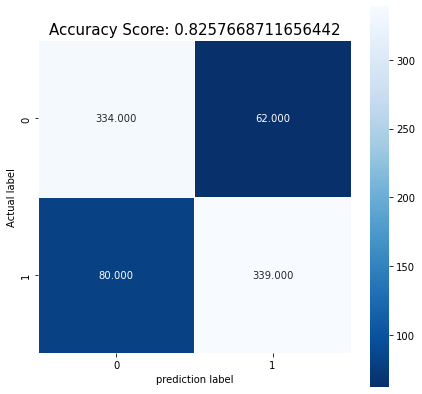

In [11]:
# plt.figure(figsize=((10,8)))
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,fmt=".3f", linewidths=.5, square=True, cmap='Blues_r'  )
plt.ylabel('Actual label')
plt.xlabel('prediction label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracyscore)
plt.title(all_sample_title, size = 15)

In [12]:
tp = 334
fp = 80
fn = 62
tn = 339

In [13]:
# summarize all features
column =[]
selected = []
model_rank = []

for i in range(X.shape[1]):
    column.append(i)
    selected.append(model.support_[i])
    model_rank.append(model.ranking_[i])
    print('Column: %d, Selected %s, Rank: %.3f' % (i, model.support_[i], model.ranking_[i]))

Column: 0, Selected False, Rank: 301.000
Column: 1, Selected False, Rank: 706.000
Column: 2, Selected False, Rank: 333.000
Column: 3, Selected False, Rank: 189.000
Column: 4, Selected False, Rank: 788.000
Column: 5, Selected False, Rank: 721.000
Column: 6, Selected False, Rank: 550.000
Column: 7, Selected False, Rank: 594.000
Column: 8, Selected False, Rank: 989.000
Column: 9, Selected False, Rank: 138.000
Column: 10, Selected False, Rank: 1066.000
Column: 11, Selected False, Rank: 846.000
Column: 12, Selected False, Rank: 106.000
Column: 13, Selected False, Rank: 528.000
Column: 14, Selected False, Rank: 298.000
Column: 15, Selected False, Rank: 174.000
Column: 16, Selected False, Rank: 517.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 909.000
Column: 19, Selected False, Rank: 910.000
Column: 20, Selected False, Rank: 416.000
Column: 21, Selected False, Rank: 516.000
Column: 22, Selected False, Rank: 943.000
Column: 23, Selected False, Rank: 532.000
Colu

In [14]:
data_tuples = list(zip(column, selected, model_rank))
table_its = pd.DataFrame(data_tuples, columns=['Column', 'Selected feature', 'Feature ranking'])
table_its.to_csv('Ache_selected_feature_SVC6.csv')
table_its

,Column,Selected feature,Feature ranking
0,0,False,301
1,1,False,706
2,2,False,333
3,3,False,189
4,4,False,788
...,...,...,...
1439,1439,True,1
1440,1440,True,1
1441,1441,False,738
1442,1442,False,249


In [15]:
import math

In [16]:
sensitivity_calc = (tp/(tp+fn))*100
sensitivity = "%.1f" %sensitivity_calc
SE = sensitivity

specificity_calc = (tn/(tn+fp)) * 100
specificity = "%.1f" %specificity_calc
SP = specificity
cn = (tp*tn)-(fn*fp)
cd = (tp+fn)*(tp+fn)*(tn+fn)*(tn+fp)
cdsqrt= math.sqrt(cd)
q=((tp+tn)/(tp+tn+fp+fn))*100

c=(cn/(cdsqrt))*100

print ("tp = %s \n fp = %s \n fn = %s \n tn = %s \n sp = %s \n se = %s \n accuracy = %.1f \n c= %.1f \n q = %.1f" %(tp,fp,fn,tn, SP, SE, accuracyscore, c , q) )

tp = 334 
 fp = 80 
 fn = 62 
 tn = 339 
 sp = 80.9 
 se = 84.3 
 accuracy = 0.8 
 c= 66.7 
 q = 82.6


In [18]:
display_result = pd.DataFrame({"Algorithms": ['SVC','','','',''],'CV':[1,2,3,4,5], 'TP': [350,335,331,329,334], 'FN':[72,70,64,65,62], 'SE%':[82.9,82.7,83.8,83.5,84.3],'TN': [329,331,337,335,339], 'FP':[64,79,83,85,80], 'SP%':[83.7,80.7,80.2,79.8,80.9], "Q":[83.3,81.7,82.0,81.6,82.6], "C":[66.0,64.2,65.5,64.8,66.7]})
display_result.to_csv('display_result_ache_svc_rfecv.csv', index=False)
display_result

,Algorithms,CV,TP,FN,SE%,TN,FP,SP%,Q,C
0,SVC,1,350,72,82.9,329,64,83.7,83.3,66.0
1,,2,335,70,82.7,331,79,80.7,81.7,64.2
2,,3,331,64,83.8,337,83,80.2,82.0,65.5
3,,4,329,65,83.5,335,85,79.8,81.6,64.8
4,,5,334,62,84.3,339,80,80.9,82.6,66.7
